## 1. Business Understanding

### Objective:
* Business Goal:
  
•	Maximize Term Deposit Subscriptions: The core aim of the marketing campaign is to increase the number of customers subscribing to term deposit products, thereby boosting the institution's savings base.

•	Improve Marketing Efficiency: By identifying the factors that predict customer responsiveness, the institution can refine its marketing strategies, leading to fewer wasted calls and more effective resource utilization.

•	Optimize Customer Targeting: Rather than taking a blanket approach to contacting customers, the bank seeks to personalize outreach efforts and focus on segments most likely to convert.

•	Enhance Customer Engagement and Satisfaction: Campaigns tailored to individual customer profiles not only increase conversion rates but also build stronger relationships and trust.

•	Reduce Operational Costs: Targeted campaigns that reach the right audience at the right time reduce unnecessary marketing expenditure while improving return on investment (ROI).



In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\Windows 10\Downloads\marketing_campaign.csv"
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 2. Data Understanding

Dataset Overview:

* Source: UCI Bank Marketing Dataset.
* Size: 11,163 rows × 17 columns.
* Key Variables:
*   Demographics: age, job, marital, education.
*   Financial info: balance, default, housing, loan.
*   Campaign interactions: contact, day, month, campaign, pdays, previous, poutcome.
*   Target: deposit (whether the client subscribed).

Actions:

* Load the Data: Use Pandas to read the CSV file and view the head of the dataset.
* Initial Exploration:
Check for missing values, distributions of numerical and categorical variables.
Identify outliers and anomalies.
Data Quality Check: Ensure the data is complete and consistent. Note any quality issues that might need cleaning.

In [444]:
# Create a dictionary mapping old column names to more intuitive names
rename_dict = {
    'age': 'Age',
    'job': 'Job',
    'marital': 'Marital',
    'education': 'Edu',
    'default': 'Cred_Default',
    'balance': 'Yearly_Ave_Bal',
    'housing': 'HousingLoan',
    'loan': 'Pers_Loan',
    'contact': 'Cont_Type',
    'day': 'Last_Cont_Day',
    'month': 'Last_Cont_Month',
    'duration': 'Last_Cont_Duration',
    'campaign': 'No_Cont_InCampaign',
    'pdays': 'Days_Since_Last_Cont',
    'previous': 'PrevContact',
    'poutcome': 'Prev_Campaign_Outcome',
    'deposit': 'Subs_TermDeposit'
}

# Rename the columns and assign to a new DataFrame
df1 = df.rename(columns=rename_dict)

# Display the updated DataFrame columns
print(df1.columns.tolist())


['Age', 'Job', 'Marital', 'Edu', 'Cred_Default', 'Yearly_Ave_Bal', 'HousingLoan', 'Pers_Loan', 'Cont_Type', 'Last_Cont_Day', 'Last_Cont_Month', 'Last_Cont_Duration', 'No_Cont_InCampaign', 'Days_Since_Last_Cont', 'PrevContact', 'Prev_Campaign_Outcome', 'Subs_TermDeposit']


In [446]:
df1

,Age,Job,Marital,Edu,Cred_Default,Yearly_Ave_Bal,HousingLoan,Pers_Loan,Cont_Type,Last_Cont_Day,Last_Cont_Month,Last_Cont_Duration,No_Cont_InCampaign,Days_Since_Last_Cont,PrevContact,Prev_Campaign_Outcome,Subs_TermDeposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [448]:
df1.shape

(11162, 17)

In [450]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    11162 non-null  int64 
 1   Job                    11162 non-null  object
 2   Marital                11162 non-null  object
 3   Edu                    11162 non-null  object
 4   Cred_Default           11162 non-null  object
 5   Yearly_Ave_Bal         11162 non-null  int64 
 6   HousingLoan            11162 non-null  object
 7   Pers_Loan              11162 non-null  object
 8   Cont_Type              11162 non-null  object
 9   Last_Cont_Day          11162 non-null  int64 
 10  Last_Cont_Month        11162 non-null  object
 11  Last_Cont_Duration     11162 non-null  int64 
 12  No_Cont_InCampaign     11162 non-null  int64 
 13  Days_Since_Last_Cont   11162 non-null  int64 
 14  PrevContact            11162 non-null  int64 
 15  Prev_Campaign_Outco

In [452]:
# Basic summary statistics
df1.describe()

,Age,Yearly_Ave_Bal,Last_Cont_Day,Last_Cont_Duration,No_Cont_InCampaign,Days_Since_Last_Cont,PrevContact
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [454]:
# Unique value counts for categorical features
for col in df1.select_dtypes(include='object').columns:
    print(f"\n{col}:\n{df1[col].value_counts()}")



Job:
Job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

Marital:
Marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

Edu:
Edu
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

Cred_Default:
Cred_Default
no     10994
yes      168
Name: count, dtype: int64

HousingLoan:
HousingLoan
no     5881
yes    5281
Name: count, dtype: int64

Pers_Loan:
Pers_Loan
no     9702
yes    1460
Name: count, dtype: int64

Cont_Type:
Cont_Type
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

Last_Cont_Month:
Last_Cont_Month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
d

In [456]:
# Check for missing values
df1.isnull().sum()

Age                      0
Job                      0
Marital                  0
Edu                      0
Cred_Default             0
Yearly_Ave_Bal           0
HousingLoan              0
Pers_Loan                0
Cont_Type                0
Last_Cont_Day            0
Last_Cont_Month          0
Last_Cont_Duration       0
No_Cont_InCampaign       0
Days_Since_Last_Cont     0
PrevContact              0
Prev_Campaign_Outcome    0
Subs_TermDeposit         0
dtype: int64

### 3. Data Distribution Analysis Overview:**

- Visualizes the distribution of key numerical features using histograms with KDE.
- Displays categorical feature counts via bar charts.
- Helps identify data patterns and informs subsequent preprocessing and modeling steps.

 #### Histogram for Numerical Features
* Visualizes the distribution (normal, skewed, etc.).
* Useful for spotting potential outliers and skewness.

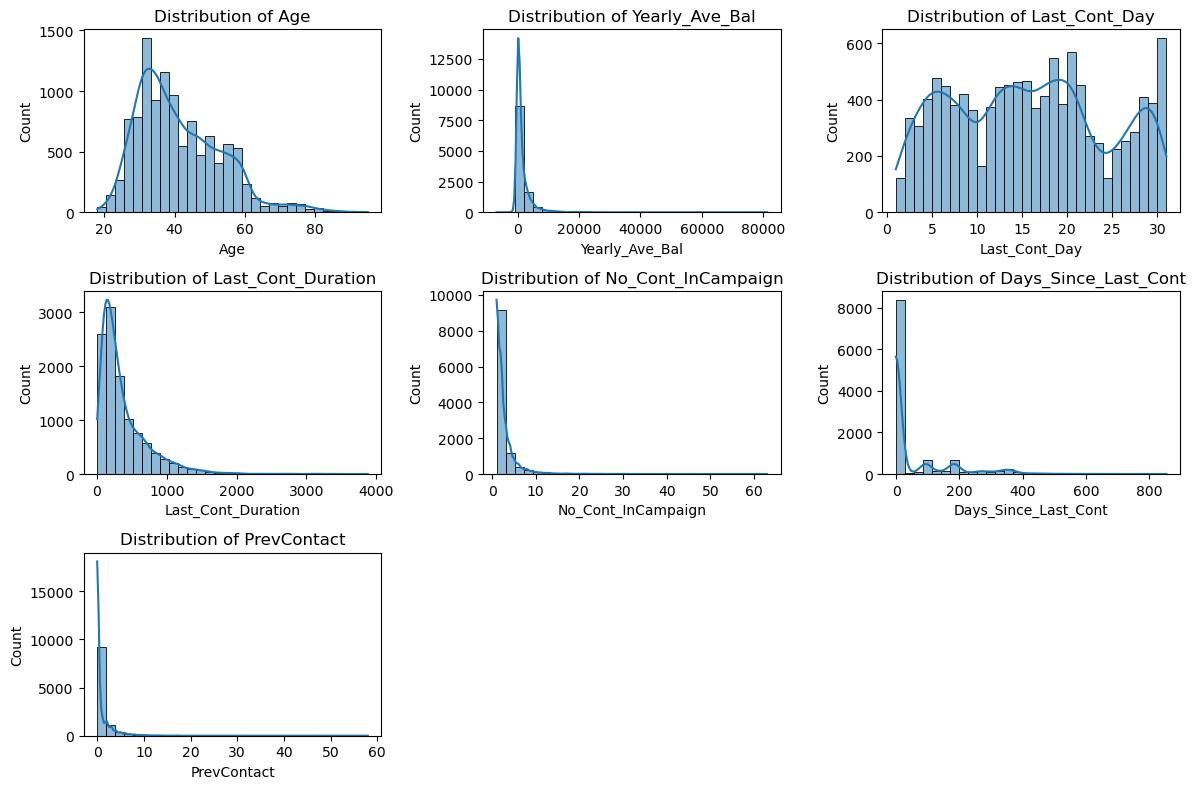

In [461]:
# Updated numerical features with your new column names
numerical_cols = [
    'Age', 
    'Yearly_Ave_Bal', 
    'Last_Cont_Day', 
    'Last_Cont_Duration', 
    'No_Cont_InCampaign', 
    'Days_Since_Last_Cont', 
    'PrevContact'
]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


#### Count Plot for Categorical Features
* Displays the distribution of categorical values.

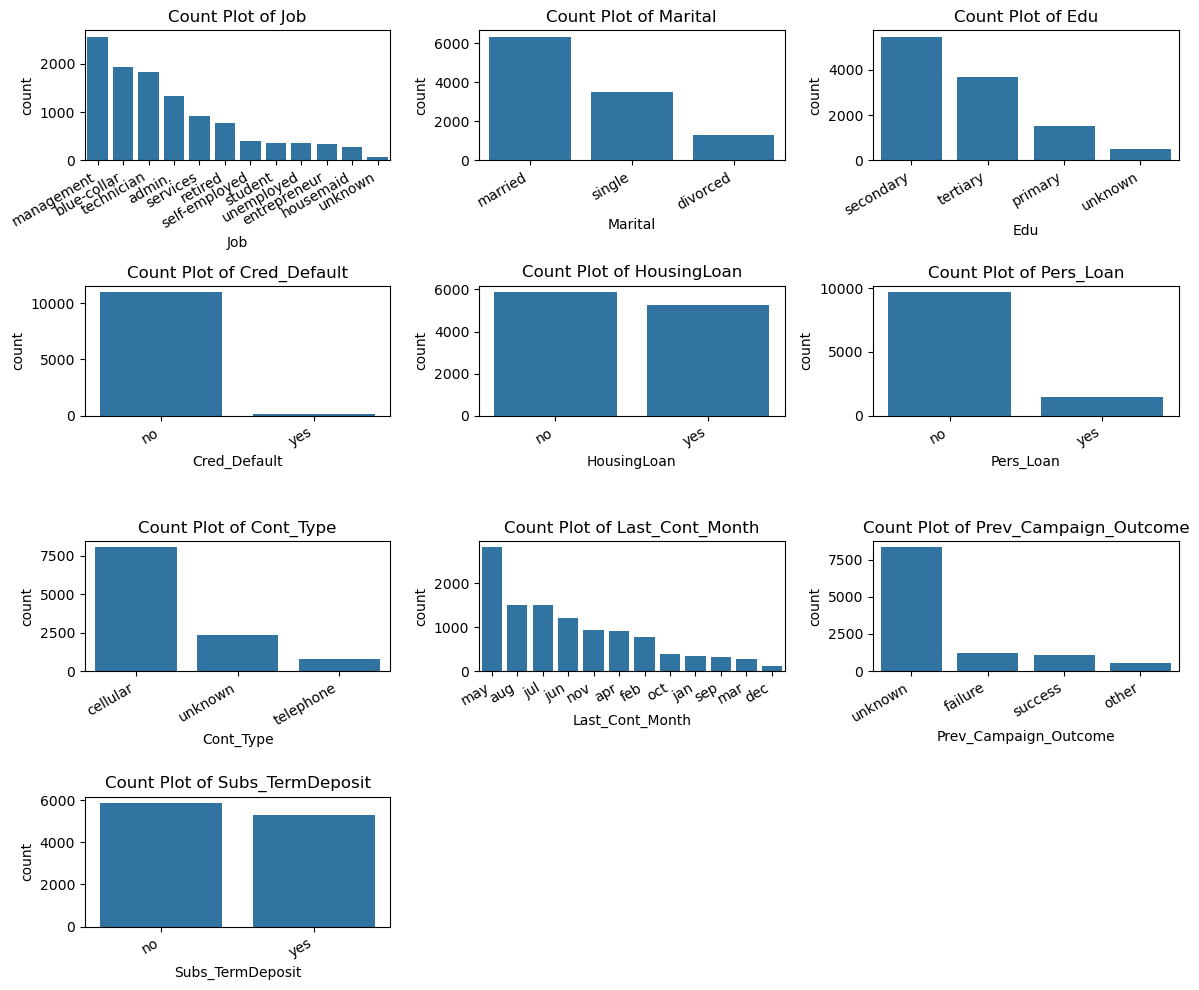

In [463]:
categorical_cols = [
    'Job', 'Marital', 'Edu', 'Cred_Default', 
    'HousingLoan', 'Pers_Loan', 'Cont_Type', 
    'Last_Cont_Month', 'Prev_Campaign_Outcome', 
    'Subs_TermDeposit'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df1, x=col, order=df1[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


#### Box Plot for Outlier Detection and handling
* Useful for visualizing the spread and identifying extreme values.

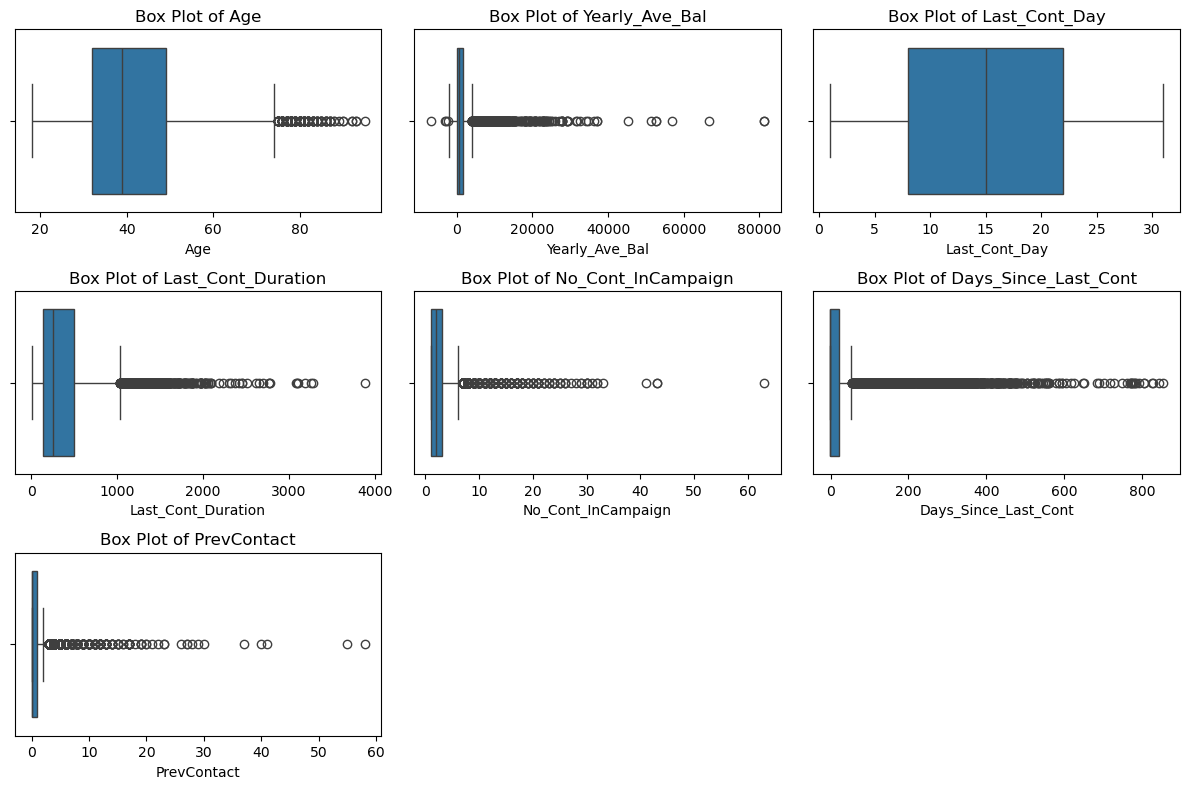

In [465]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df1[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


### Understanding and observing the relationship between call duration and Term deposit Subscription

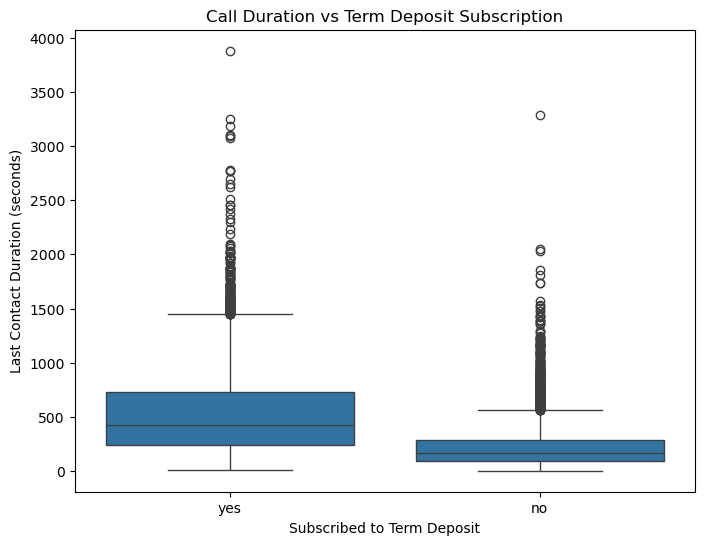

In [467]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subs_TermDeposit', y='Last_Cont_Duration', data=df1)
plt.title('Call Duration vs Term Deposit Subscription')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Last Contact Duration (seconds)')
plt.show()


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_12820\2090033430.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_plot.groupby('Duration_Bin')['Subscribed'].mean().reset_index()


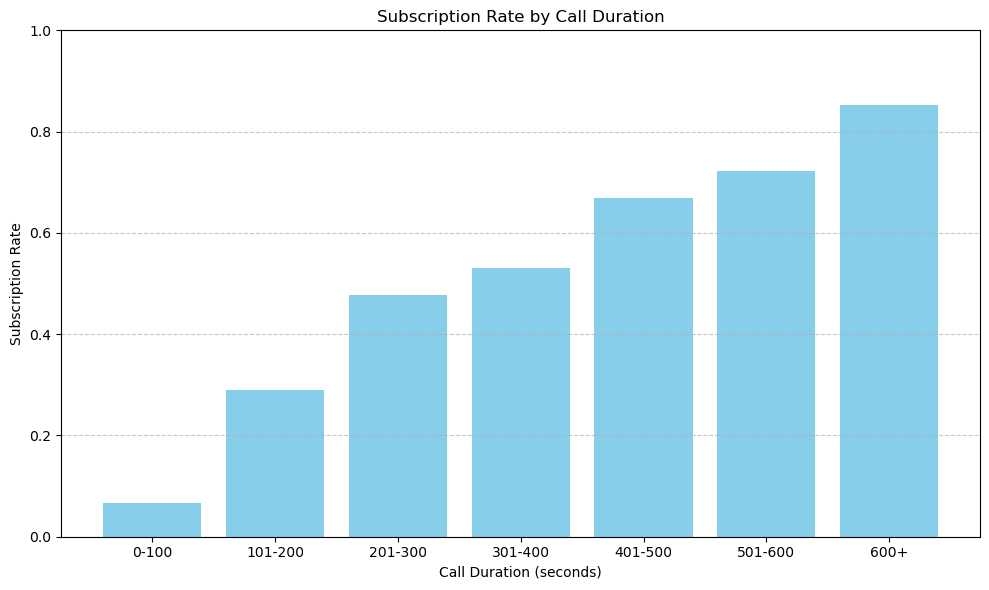

In [468]:
# Create a copy of df1 for plotting purposes
df_plot = df1.copy()

# Convert 'Subs_TermDeposit' to binary
df_plot['Subscribed'] = df_plot['Subs_TermDeposit'].map({'yes': 1, 'no': 0})

# Create duration bins
bins = [0, 100, 200, 300, 400, 500, 600, df_plot['Last_Cont_Duration'].max()]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '600+']
df_plot['Duration_Bin'] = pd.cut(df_plot['Last_Cont_Duration'], bins=bins, labels=labels, include_lowest=True)

# Calculate subscription rate per bin
bin_summary = df_plot.groupby('Duration_Bin')['Subscribed'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_summary['Duration_Bin'], bin_summary['Subscribed'], color='skyblue')
plt.title('Subscription Rate by Call Duration')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Subscription Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


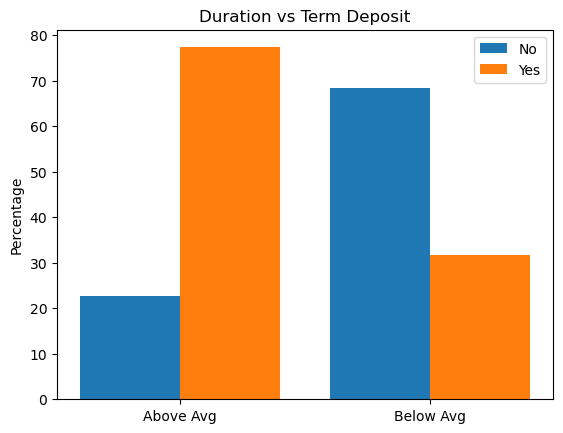

In [470]:
# Create duration status
avg_duration = df_plot['Last_Cont_Duration'].mean()
df_plot['Duration_Status'] = np.where(df_plot['Last_Cont_Duration'] >= avg_duration, 'Above Avg', 'Below Avg')

# Calculate percentage table
pct_table = pd.crosstab(df_plot['Duration_Status'], df_plot['Subs_TermDeposit'], normalize='index') * 100

# Basic plot
x = np.arange(len(pct_table.index))
yes = pct_table['yes']
no = pct_table['no']
width = 0.4

fig, ax = plt.subplots()
ax.bar(x - width/2, no, width, label='No')
ax.bar(x + width/2, yes, width, label='Yes')

ax.set_xticks(x)
ax.set_xticklabels(pct_table.index)
ax.set_ylabel('Percentage')
ax.set_title('Duration vs Term Deposit')
ax.legend()

plt.show()


## Data Cleaning and handling outliers

In [487]:
df1.columns

Index(['Age', 'Job', 'Marital', 'Edu', 'Cred_Default', 'Yearly_Ave_Bal',
       'HousingLoan', 'Pers_Loan', 'Cont_Type', 'Last_Cont_Day',
       'Last_Cont_Month', 'Last_Cont_Duration', 'No_Cont_InCampaign',
       'Days_Since_Last_Cont', 'PrevContact', 'Prev_Campaign_Outcome',
       'Subs_TermDeposit'],
      dtype='object')

In [489]:
df1

,Age,Job,Marital,Edu,Cred_Default,Yearly_Ave_Bal,HousingLoan,Pers_Loan,Cont_Type,Last_Cont_Day,Last_Cont_Month,Last_Cont_Duration,No_Cont_InCampaign,Days_Since_Last_Cont,PrevContact,Prev_Campaign_Outcome,Subs_TermDeposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [491]:
#observing the unknown values'Prev_Campaign_Outcome' to be deleted.
df1['Prev_Campaign_Outcome'].value_counts()

Prev_Campaign_Outcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [493]:
#observing the unknown values 'Days_Since_Last_Cont' to be deleted.
df1['Days_Since_Last_Cont']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
11157     -1
11158     -1
11159     -1
11160    172
11161     -1
Name: Days_Since_Last_Cont, Length: 11162, dtype: int64

In [495]:
# Calculate the percentage of -1 values in the column
negative_one_percent = (df1['Days_Since_Last_Cont'] == -1).sum() / len(df1) * 100
print(f"Percentage of -1 values: {negative_one_percent:.2f}%")

Percentage of -1 values: 74.57%


In [497]:
# dropping both 'Prev_Campaign_Outcome' and 'Days_Since_Last_Cont' because they have less influence and the values are inconsistence
# Create a new DataFrame by dropping the specified columns from df1
df2 = df1.drop(['Prev_Campaign_Outcome', 'Days_Since_Last_Cont'], axis=1)

In [499]:
df2.columns

Index(['Age', 'Job', 'Marital', 'Edu', 'Cred_Default', 'Yearly_Ave_Bal',
       'HousingLoan', 'Pers_Loan', 'Cont_Type', 'Last_Cont_Day',
       'Last_Cont_Month', 'Last_Cont_Duration', 'No_Cont_InCampaign',
       'PrevContact', 'Subs_TermDeposit'],
      dtype='object')

In [501]:
df2.shape

(11162, 15)

In [503]:
df2

,Age,Job,Marital,Edu,Cred_Default,Yearly_Ave_Bal,HousingLoan,Pers_Loan,Cont_Type,Last_Cont_Day,Last_Cont_Month,Last_Cont_Duration,No_Cont_InCampaign,PrevContact,Subs_TermDeposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,no


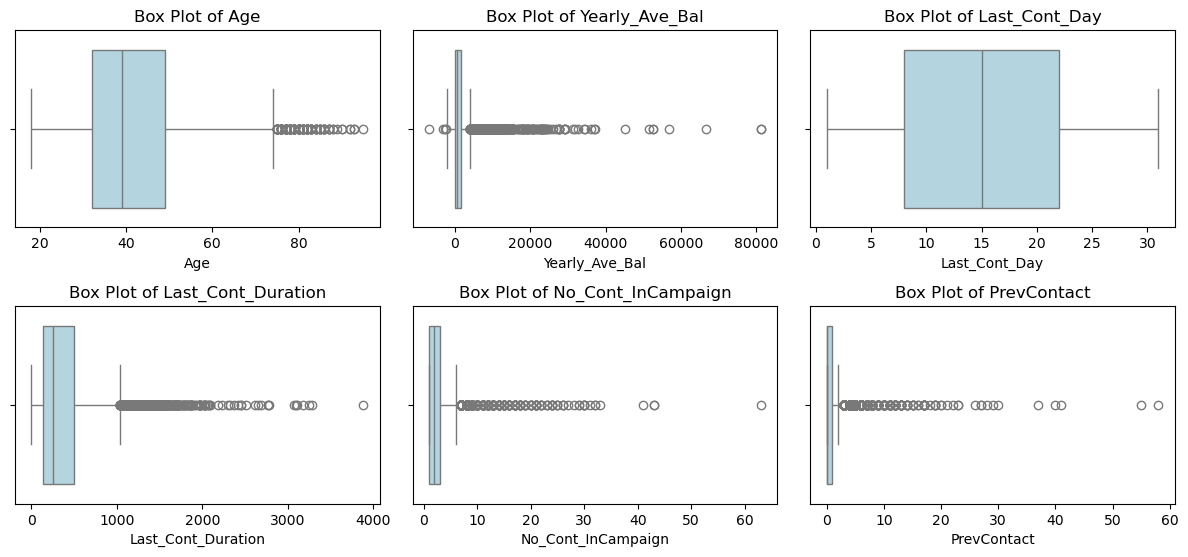

In [505]:
# Re-define numerical columns to ensure they're consistent with df2
numerical_cols = [
    'Age', 
    'Yearly_Ave_Bal', 
    'Last_Cont_Day', 
    'Last_Cont_Duration', 
    'No_Cont_InCampaign', 
    'PrevContact'
]

# Plot box plots for numerical features to identify outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df2, x=col, color='lightblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [508]:
# removing outliers
# Make a copy of df to preserve original structure in df1 and df2
df3 = df2.copy()

# Remove entries where 'Yearly_Ave_Bal' is negative or greater than 40000
df3 = df3[(df3['Yearly_Ave_Bal'] >= 0) & (df3['Yearly_Ave_Bal'] <= 40000)]

# Remove entries where 'Last_Cont_Duration' is greater than 3000 seconds
df3 = df3[df3['Last_Cont_Duration'] <= 3000]

# Remove entries where 'No_Cont_InCampaign' is greater than 30 (major outliers)
df3 = df3[df3['No_Cont_InCampaign'] <= 30]

# Remove entries where 'PrevContact' is greater than 30 (major outliers)
df3 = df3[df3['PrevContact'] <= 30]

# Final dataframe df3 now has the specified outliers removed


In [512]:
df3

,Age,Job,Marital,Edu,Cred_Default,Yearly_Ave_Bal,HousingLoan,Pers_Loan,Cont_Type,Last_Cont_Day,Last_Cont_Month,Last_Cont_Duration,No_Cont_InCampaign,PrevContact,Subs_TermDeposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,no


In [514]:
df3.columns

Index(['Age', 'Job', 'Marital', 'Edu', 'Cred_Default', 'Yearly_Ave_Bal',
       'HousingLoan', 'Pers_Loan', 'Cont_Type', 'Last_Cont_Day',
       'Last_Cont_Month', 'Last_Cont_Duration', 'No_Cont_InCampaign',
       'PrevContact', 'Subs_TermDeposit'],
      dtype='object')

In [516]:
df3.shape

(10449, 15)

In [519]:
# Create a copy of df3 to preserve the original structure
df4 = df3.copy()

# Count 'unknown' values in each row
df4['unknown_count'] = (df4 == 'unknown').sum(axis=1)

# Calculate statistics before dropping
rows_with_multiple_unknowns = df4[df4['unknown_count'] > 1]
unknown_percentage = (len(rows_with_multiple_unknowns) / len(df4)) * 100
print("Number of rows with at least 2 'unknown' values:", len(rows_with_multiple_unknowns))
print("Percentage of rows with at least 2 'unknown' values: {:.2f}%".format(unknown_percentage))

# Drop rows with more than 1 'unknown' value
df4 = df4[df4['unknown_count'] <= 1].copy()

# Drop the helper column
df4.drop(columns='unknown_count', inplace=True)

# Confirm action
print(f"Remaining rows after dropping: {len(df4)}")


Number of rows with at least 2 'unknown' values: 128
Percentage of rows with at least 2 'unknown' values: 1.22%
Remaining rows after dropping: 10321


In [522]:
df4

,Age,Job,Marital,Edu,Cred_Default,Yearly_Ave_Bal,HousingLoan,Pers_Loan,Cont_Type,Last_Cont_Day,Last_Cont_Month,Last_Cont_Duration,No_Cont_InCampaign,PrevContact,Subs_TermDeposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,no


### Correlation heatmap

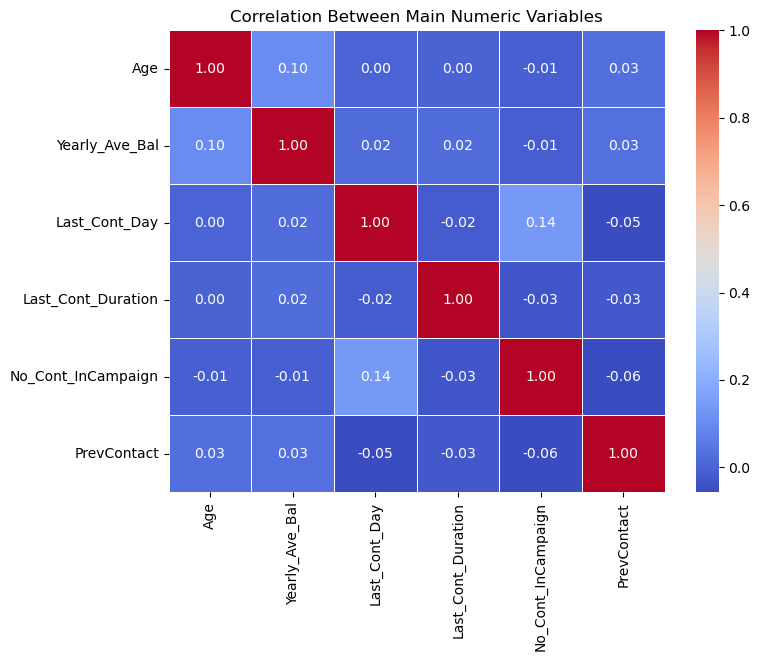

In [525]:
# Select only numeric columns
numeric_df4 = df4.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df4.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Main Numeric Variables')
plt.show()


In [527]:
##There is No Multi-colinearity Problem as No relation with inputs columns

In [529]:
df4.columns

Index(['Age', 'Job', 'Marital', 'Edu', 'Cred_Default', 'Yearly_Ave_Bal',
       'HousingLoan', 'Pers_Loan', 'Cont_Type', 'Last_Cont_Day',
       'Last_Cont_Month', 'Last_Cont_Duration', 'No_Cont_InCampaign',
       'PrevContact', 'Subs_TermDeposit'],
      dtype='object')

In [531]:
df4

,Age,Job,Marital,Edu,Cred_Default,Yearly_Ave_Bal,HousingLoan,Pers_Loan,Cont_Type,Last_Cont_Day,Last_Cont_Month,Last_Cont_Duration,No_Cont_InCampaign,PrevContact,Subs_TermDeposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,no


In [533]:
# Save df4 as a CSV file in the current directory
df4.to_csv('cleaned_download.csv', index=False)

# Optional: Display download link (for Jupyter Notebook)
from IPython.display import FileLink
FileLink('cleaned_download.csv')


C:\Users\Windows 10\Downloads\cleaned_download.csv

## Preprocessing

In [537]:
# Make a copy of the original dataset
df_original = df4.copy()
df = df4.copy()  # df will be used for preprocessing


In [539]:
import pandas as pd

# Map target variable to binary
df['Subs_TermDeposit'] = df['Subs_TermDeposit'].map({'yes': 1, 'no': 0})

# One-hot encode categorical features
categorical_cols = ['Job', 'Marital', 'Edu', 'Cred_Default', 
                    'HousingLoan', 'Pers_Loan', 'Cont_Type', 'Last_Cont_Month']
df_enc = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# View final dataset after encoding
print("Final dataset after one-hot encoding:")
display(df_enc.head())  # Or use print(df_enc.head()) if not in Jupyter


Final dataset after one-hot encoding:


,Age,Yearly_Ave_Bal,Last_Cont_Day,Last_Cont_Duration,No_Cont_InCampaign,PrevContact,Subs_TermDeposit,Job_admin.,Job_blue-collar,Job_entrepreneur,...,Last_Cont_Month_dec,Last_Cont_Month_feb,Last_Cont_Month_jan,Last_Cont_Month_jul,Last_Cont_Month_jun,Last_Cont_Month_mar,Last_Cont_Month_may,Last_Cont_Month_nov,Last_Cont_Month_oct,Last_Cont_Month_sep
0,59,2343,5,1042,1,0,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,56,45,5,1467,1,0,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,41,1270,5,1389,1,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,55,2476,5,579,1,0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,54,184,5,673,2,0,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [541]:
# Drop the target column temporarily to avoid including it in numeric selection
numeric_cols = df_enc.drop(columns='Subs_TermDeposit').select_dtypes(include=['int64', 'float64']).columns.tolist()

# View the numeric columns that need scaling
print("Numeric columns to be standardized:")
print(numeric_cols)


Numeric columns to be standardized:
['Age', 'Yearly_Ave_Bal', 'Last_Cont_Day', 'Last_Cont_Duration', 'No_Cont_InCampaign', 'PrevContact']


In [543]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_enc[numeric_cols] = scaler.fit_transform(df_enc[numeric_cols])


In [547]:
df_enc

,Age,Yearly_Ave_Bal,Last_Cont_Day,Last_Cont_Duration,No_Cont_InCampaign,PrevContact,Subs_TermDeposit,Job_admin.,Job_blue-collar,Job_entrepreneur,...,Last_Cont_Month_dec,Last_Cont_Month_feb,Last_Cont_Month_jan,Last_Cont_Month_jul,Last_Cont_Month_jun,Last_Cont_Month_mar,Last_Cont_Month_may,Last_Cont_Month_nov,Last_Cont_Month_oct,Last_Cont_Month_sep
0,1.472363,0.260443,-1.263002,1.981122,-0.587418,-0.401768,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1.223222,-0.550965,-1.263002,3.234608,-0.587418,-0.401768,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.022482,-0.118426,-1.263002,3.004556,-0.587418,-0.401768,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1.140175,0.307405,-1.263002,0.615560,-0.587418,-0.401768,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1.057128,-0.501885,-1.263002,0.892801,-0.186973,-0.401768,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.686857,-0.566501,0.517099,-0.334140,-0.587418,-0.401768,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
11158,-0.188575,-0.308037,0.042406,-0.847332,0.613917,-0.401768,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11159,-0.769904,-0.556614,0.398426,-0.632027,-0.186973,-0.401768,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11160,0.143612,-0.566854,-0.906981,-1.065586,-0.186973,1.975626,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Separate features and target and  Scale numerical features

In [555]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_enc.drop('Subs_TermDeposit', axis=1)
y = df_enc['Subs_TermDeposit']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scale numerical features
numeric_cols = ['Age', 'Yearly_Ave_Bal', 'Last_Cont_Day', 
                'Last_Cont_Duration', 'No_Cont_InCampaign', 'PrevContact']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])


### Data Modelling

In [559]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ("Gradient Boosted Trees", GradientBoostingClassifier(random_state=42)),
    ("SVM", SVC(kernel='linear', probability=True, random_state=42)),  # using linear kernel for efficiency
    ("KNN", KNeighborsClassifier()),
    ("Bagging Classifier", BaggingClassifier(random_state=42)),
    ("Extra Trees", ExtraTreesClassifier(random_state=42))
]

# Train each model and evaluate metrics
results = []
for name, model in models:
    model.fit(X_train, y_train)
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    # Calculate metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    roc  = roc_auc_score(y_test, y_proba) if y_proba is not None else roc_auc_score(y_test, model.decision_function(X_test))
    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    results.append((name, acc, prec, rec, f1, roc, tn, fp, fn, tp))




# Create a DataFrame of results for easy viewing
columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "TN", "FP", "FN", "TP"]
results_df = pd.DataFrame(results, columns=columns)
# Sort by F1-Score (you could also sort by ROC-AUC)
results_df = results_df.sort_values(by="F1-Score", ascending=False)
print(results_df[["Model","Accuracy","Precision","Recall","F1-Score","ROC-AUC"]].round(2))


C:\Users\Windows 10\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:44:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                    Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
3                 XGBoost      0.86       0.83    0.89      0.86     0.91
2           Random Forest      0.85       0.81    0.89      0.85     0.91
4  Gradient Boosted Trees      0.85       0.82    0.88      0.85     0.91
7      Bagging Classifier      0.83       0.82    0.83      0.83     0.90
5                     SVM      0.82       0.81    0.83      0.82     0.89
0     Logistic Regression      0.82       0.82    0.81      0.81     0.89
8             Extra Trees      0.81       0.80    0.82      0.81     0.89
6                     KNN      0.79       0.79    0.78      0.79     0.86
1           Decision Tree      0.79       0.79    0.78      0.78     0.79


In [560]:
results.append((name, acc, prec, rec, f1, roc, tn, fp, fn, tp))


In [561]:
for row in results:
    name, acc, prec, rec, f1, roc, tn, fp, fn, tp = row
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(f"TN: {tn}, FP: {fp}")
    print(f"FN: {fn}, TP: {tp}")



Model: Logistic Regression
Confusion Matrix:
TN: 1318, FP: 270
FN: 288, TP: 1221

Model: Decision Tree
Confusion Matrix:
TN: 1269, FP: 319
FN: 334, TP: 1175

Model: Random Forest
Confusion Matrix:
TN: 1284, FP: 304
FN: 173, TP: 1336

Model: XGBoost
Confusion Matrix:
TN: 1312, FP: 276
FN: 164, TP: 1345

Model: Gradient Boosted Trees
Confusion Matrix:
TN: 1302, FP: 286
FN: 188, TP: 1321

Model: SVM
Confusion Matrix:
TN: 1293, FP: 295
FN: 263, TP: 1246

Model: KNN
Confusion Matrix:
TN: 1283, FP: 305
FN: 331, TP: 1178

Model: Bagging Classifier
Confusion Matrix:
TN: 1317, FP: 271
FN: 249, TP: 1260

Model: Extra Trees
Confusion Matrix:
TN: 1284, FP: 304
FN: 276, TP: 1233

Model: Extra Trees
Confusion Matrix:
TN: 1284, FP: 304
FN: 276, TP: 1233


C:\Users\Windows 10\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:47:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


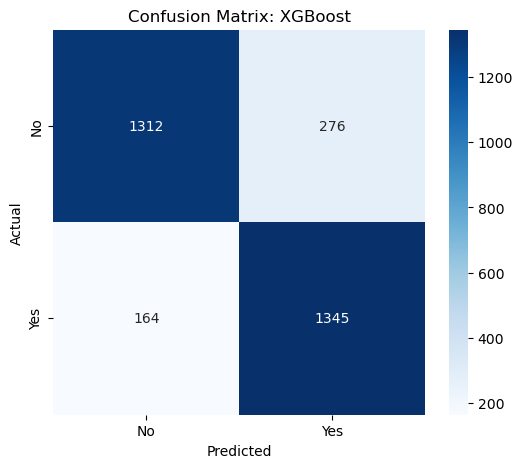

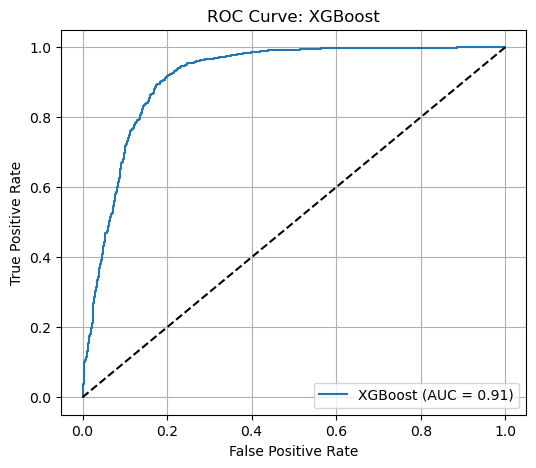

In [565]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Select the best model (XGBoost in this case)
best_model_name = "XGBoost"
best_model = [model for name, model in models if name == best_model_name][0]

# Fit the model (assuming it hasn't been trained already in this notebook)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {best_model_name}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


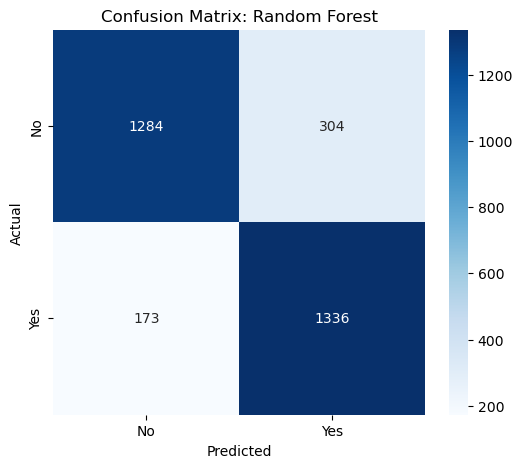

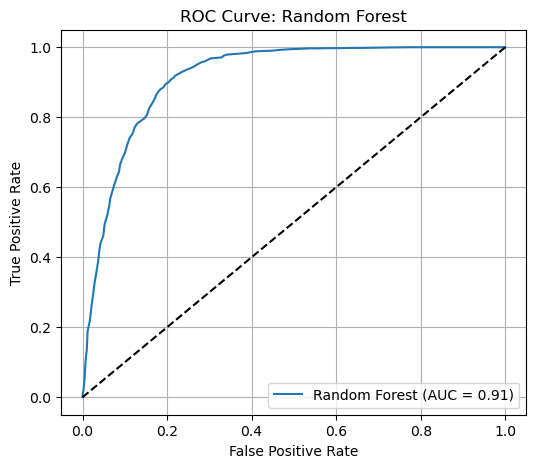


Model: Random Forest
Confusion Matrix:
TN: 1284, FP: 304
FN: 173, TP: 1336


C:\Users\Windows 10\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:47:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


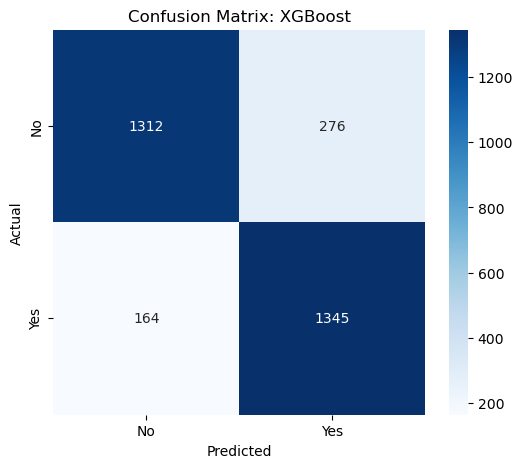

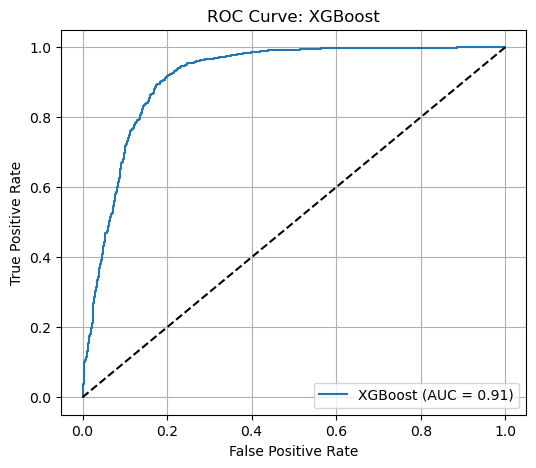


Model: XGBoost
Confusion Matrix:
TN: 1312, FP: 276
FN: 164, TP: 1345


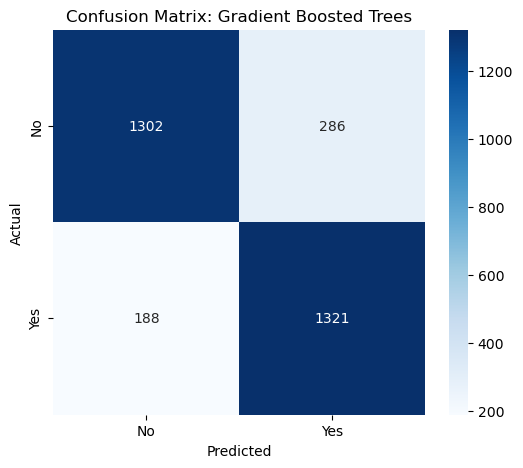

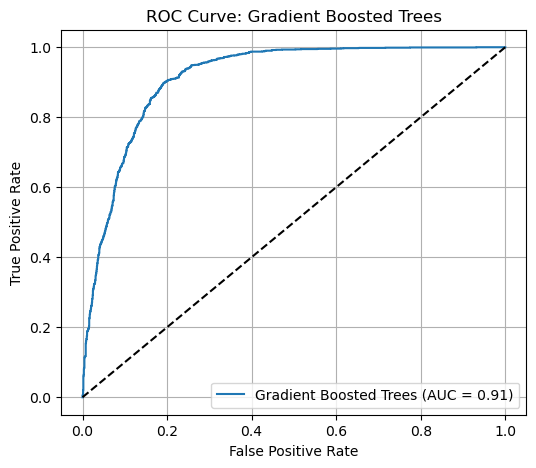


Model: Gradient Boosted Trees
Confusion Matrix:
TN: 1302, FP: 286
FN: 188, TP: 1321


In [571]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming 'results' contains tuples: (name, acc, prec, rec, f1, roc_auc, tn, fp, fn, tp)
# Sort models by ROC-AUC score in descending order
top3_results = sorted(results, key=lambda x: x[5], reverse=True)[:3]  # Index 5 is ROC-AUC

# Assuming 'models' contains: (model_name, model_instance)
model_dict = {name: model for name, model in models}

for row in top3_results:
    name, acc, prec, rec, f1, roc_auc_val, tn, fp, fn, tp = row
    model = model_dict[name]

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Print confusion matrix values
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(f"TN: {tn}, FP: {fp}")
    print(f"FN: {fn}, TP: {tp}")

